In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D

In [2]:
N_list = [21,41,61,81,101,201]
txt_list = ['./Separable/micro_datas_umax_eq_N/Sep1_N{}.npz', 
            './Non-Separable/micro_datas_umax_eq_N/NonSep1_N{}.npz']

""" solve in finer grid  """
print("******* solve in finer grid  ********")
def fname(text,N):
    npzfile = np.load(text.format(N))
    Nt = npzfile['Nt']
    v_mfe=npzfile['v_mfe']
    v_bar=npzfile['v_bar']
    v_error=np.asarray([np.linalg.norm(v_mfe[i,:]-v_bar[i,:], ord=np.inf) for i in range(N)])
    J_mfe=npzfile['J_mfe']
    J_bar=npzfile['J_bar']
    return v_error , J_mfe, J_bar 


******* solve in finer grid  ********


In [3]:
#pip install latex
#sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import argparse
import pylab

def set_size(width, fraction=1, subplot=[1,1]):
    if width == 'elsevier':
        width_pt=468.0
    elif width == 'beamer':
        width_pt=307.28987
    else:
        width_pt=width
    fig_width_pt=width_pt*fraction  # Width of figure
    inches_per_pt=1/80           # Convert from pt to inches
    golden_ratio=0.3               # (5**.5 - 1)/2
    fig_width_in=fig_width_pt*inches_per_pt  # Figure width in inches
    fig_hight_in=fig_width_in*golden_ratio*(subplot[0]/subplot[1])
    fig_dim=(fig_width_in,fig_hight_in)
#     print(fig_dim)
    return fig_dim

plt.style.use('seaborn-colorblind') # Using seaborn's style
nice_fonts={
    "text.usetex" : True,
    "font.family" : "serif",
    "axes.labelsize" : 5,
    "font.size" : 10,
    "legend.fontsize" : 8,
    "xtick.labelsize" : 8,
    "ytick.labelsize" :8,
}
mpl.rcParams.update(nice_fonts)

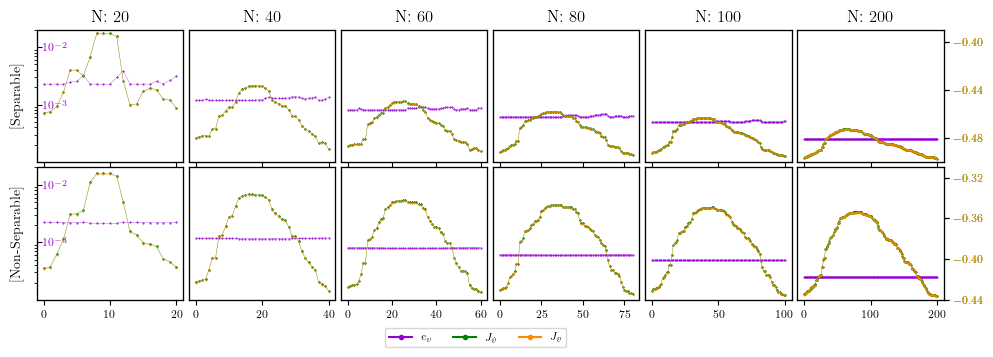

<Figure size 640x480 with 0 Axes>

In [7]:
ln=len(txt_list); col=len(N_list)
fig, axs = plt.subplots(ln, col, figsize=set_size('elsevier',fraction=2.0))
for i in range(ln):
    for j in range(col):
        v_error, J_mfe, J_bar = fname(txt_list[i],N_list[j])
        y = np.arange(0,N_list[j])
        axs[i, j].scatter(y,v_error/N_list[j],s=1.0,marker=".",c='darkviolet',label=r'$e_{v}$')  # linestyle='solid','dotted'
        axs[i, j].plot(y,v_error/N_list[j],'darkviolet',linewidth=0.2)
        axs[0, j].set(ylim=(1.0e-4,0.2e-1))
        axs[1, j].set(ylim=(1.0e-4,0.2e-1))
        axs[i, j].set_yscale("log")
        axs[i, j].set_yticks([1.0e-2,1.0e-3])
        #axs[i, j].grid()
        #axs[i, j].set_xticks([0,0.5,1])
        axs2 = axs[i, j].twinx()
        axs3 = axs[i, j].twinx()
        #axs2.plot(y,J_mfe,'r.',label=r'$J_{mfe}$',linewidth=0.05)
        #axs2.plot(y,J_bar,'r+',label=r'$J_{bar}$',linewidth=0.05)
        axs2.scatter(y,J_mfe,s=0.6,marker="*",c='green',label=r'$J_{MFE}$')
        axs2.plot(y,J_mfe,'green',linewidth=0.2)
    
        axs3.scatter(y,J_bar,s=0.6,marker=".",c='darkorange',label=r'$\bar{J}$')
        axs3.plot(y,J_bar,'darkorange',linewidth=0.2)
        #axs2.set(xlim=(0,N_list[j]), ylim=(-0.44,-0.31))
        if j!=0: 
            axs[i, j].set_yticklabels([])#.set_yticks([])
            axs[i, j].tick_params(axis='both', which='both', left=False)
        else:   
            axs[i, j].tick_params(axis='y', labelcolor='darkviolet',direction="in",pad=-22)
        if i==0: 
            axs2.set_title(f"N: {N_list[j]-1}")
            axs2.set_ylim(ymin=-0.50, ymax=-0.39)
            axs3.set_ylim(ymin=-0.50, ymax=-0.39)
            axs2.set_yticks([-0.48,-0.44,-0.40])
            axs3.set_yticks([-0.48,-0.44,-0.40])
        else:
            axs2.set_ylim(ymin=-0.44, ymax=-0.31)
            axs3.set_ylim(ymin=-0.44, ymax=-0.31)
            axs2.set_yticks([-0.44,-0.40,-0.36, -0.32])
            axs3.set_yticks([-0.44,-0.40,-0.36, -0.32])
        if i==ln-1: 
            axs2.set_xlabel("idx", fontsize = 10)
        else:
            axs2.set_xticklabels([])#set_xticks([])
            axs3.set_xticklabels([])
        if j!=col-1: 
            axs2.set_yticklabels([])
            axs2.tick_params(axis='both', which='both', right=False)
            axs3.set_yticklabels([])
            axs3.tick_params(axis='both', which='both', right=False)
        else: 
            #axs2.set_ylabel('cost', color='green', fontsize = 10)
            axs2.tick_params(axis='y', labelcolor='green')#,direction="out",pad=26)
            axs3.tick_params(axis='y', labelcolor='darkorange')
            #axs3.new_fixed_axis(loc="right",offset=(60,0))
        plt.subplots_adjust(wspace=0.04, hspace=0.04)
            
        
#axs[ln-1, col].set_xlabel(r'$\rho$', fontsize = 12)
#axs[0, 0].set_ylabel("[LWR]", fontsize= 10)
axs[0, 0].set_ylabel("[Separable]", fontsize = 10)
axs[1, 0].set_ylabel("[Non-Separable]", fontsize = 10)
#plt.xticks(rotation = 45)
labels=[r'$e_{v}$',r'$J_{MFE}$',r'$\bar{J}$']
handles=[Line2D([0], [0],marker='.',color='darkviolet',label=r'$e_{v}$'),
         Line2D([0], [0],marker='.',color='green',label=r'$J_{\hat{v}}$'),
         Line2D([0], [0],marker='.',color='darkorange',label=r'$J_{\bar{v}}$')]
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.04), ncol=8,) #center right

plt.show()
#fig.savefig("./fig_1class_micro_sep_nonsep.pdf", dpi=300, bbox_inches='tight')
#fig.savefig("./fig_1class_micro_sep_nonsep.png", dpi=300, bbox_inches='tight')

plt.clf()

In [34]:
N_list=[21,41,61,81,101,201]
ln=len(txt_list); col=len(N_list)
MaxRA=np.zeros((ln,col))
MeanRA=np.zeros((ln,col))
for i in range(ln):
    for j in range(col):
        v_error, J_mfe, J_bar = fname(txt_list[i],N_list[j])
        accuracy = np.asarray([sum(x) for x in zip(J_mfe,-J_bar)])
        MaxRA[i,j] = accuracy.max()/abs(J_mfe).max()
        MeanRA[i,j] = sum(accuracy)/sum(abs(J_mfe))
MaxRA
import math
log_N = [math.log(x) for x in N_list]
log_MaxRA = [[math.log(x) for x in MaxRA[i,:]] for i in range(ln)]
log_MeanRA = [[math.log(x) for x in MeanRA[i,:]] for i in range(ln)]
from scipy.stats import linregress
max_res=[linregress(log_N, log_MaxRA[i]) for i in range(ln)]
mean_res=[linregress(log_N, log_MeanRA[i]) for i in range(ln)]
max_slope=[max_res[i].slope for i in range(ln)] 
mean_slope=[mean_res[i].slope for i in range(ln)]

[-1.4135866765880831, -0.9947554860116951]

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import argparse
import pylab

def set_size(width, fraction=1, subplot=[1,1]):
    if width == 'elsevier':
        width_pt=468.0
    elif width == 'beamer':
        width_pt=307.28987
    else:
        width_pt=width
    fig_width_pt=width_pt*fraction  # Width of figure
    inches_per_pt=1/80           # Convert from pt to inches
    golden_ratio=0.8               # (5**.5 - 1)/2
    fig_width_in=fig_width_pt*inches_per_pt  # Figure width in inches
    fig_hight_in=fig_width_in*golden_ratio*(subplot[0]/subplot[1])
    fig_dim=(fig_width_in,fig_hight_in)
#     print(fig_dim)
    return fig_dim

plt.style.use('seaborn-colorblind') # Using seaborn's style
nice_fonts={
    "text.usetex" : True,
    "font.family" : "serif",
    "axes.labelsize" : 5,
    "font.size" : 10,
    "legend.fontsize" : 8,
    "xtick.labelsize" : 8,
    "ytick.labelsize" :8,
}
mpl.rcParams.update(nice_fonts)

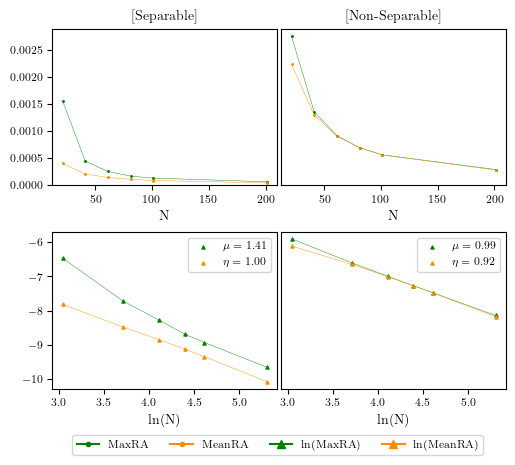

<Figure size 640x480 with 0 Axes>

In [37]:
ln=2; col=2
fig, axs = plt.subplots(ln, col, figsize=set_size('elsevier',fraction=1.0))
for i in range(ln):
    for j in range(col):
        if i==0:
            axs[i, j].scatter(N_list[:], MaxRA[j,:], s=5, marker=".",c='green', label=r'$MaxRA$')
            axs[i, j].plot(N_list[:], MaxRA[j,:],'green',linewidth=0.3, label=r'$MaxRA$')
            axs[i, j].scatter(N_list[:], MeanRA[j,:], s=5,marker=".",c='darkorange', label=r'$MeanRA$')
            axs[i, j].plot(N_list[:], MeanRA[j,:],'darkorange',linewidth=0.3, label=r'$MeanRA$')
            #axs[i, j].set_yscale("log")
        else:
            label1=r'$\mu={:.2f}$'.format(-max_slope[j]); label2=r'$\eta={:.2f}$'.format(-mean_slope[j])
            axs[i, j].scatter(log_N, log_MaxRA[j], s=5, marker="^",c='green', label=label1)
            axs[i, j].plot(log_N, log_MaxRA[j],'green',linewidth=0.3)#, label=label1)
            axs[i, j].scatter(log_N, log_MeanRA[j], s=5, marker="^",c='darkorange', label=label2)
            axs[i, j].plot(log_N, log_MeanRA[j],'darkorange',linewidth=0.3)#, label=label2)
            axs[i, j].legend()
            
        axs[0, j].set_ylim(ymin=0.0, ymax=0.0029)
        axs[1, j].set_ylim(ymin=-10.3, ymax=-5.7)
        
        if j!=0: 
            axs[i, j].set_yticklabels([])#.set_yticks([])
            axs[i, j].tick_params(axis='both', which='both', left=False)
        
        plt.subplots_adjust(wspace=0.02, hspace=0.3)
        
axs[0,0].set_xlabel("N", fontsize = 10)
axs[0,1].set_xlabel("N", fontsize = 10)
axs[1,0].set_xlabel("ln(N)", fontsize = 10) 
axs[1,1].set_xlabel("ln(N)", fontsize = 10)

axs[0, 0].set_title("[Separable]", fontsize = 10)
axs[0, 1].set_title("[Non-Separable]", fontsize = 10)

#plt.xticks(rotation = 45)
labels=[r'$MaxRA$',r'$MeanRA$',r'$ln(MaxRA)$',r'$ln(MeanRA)$']
handles=[Line2D([0], [0],marker='.',color='green',label='MaxRA'),
         Line2D([0], [0],marker='.',color='darkorange',label='MeanRA'),
         Line2D([0], [0],marker='^',color='green',label='ln(MaxRA)'),
        Line2D([0], [0],marker='^',color='darkorange',label='ln(MeanRA)')]
fig.legend(handles=handles, loc='center right', bbox_to_anchor=(0.87, -0.01), ncol=4,) #center right

plt.show()
#fig.savefig("./fig_1class_RA_sep_nonsep.pdf", dpi=300, bbox_inches='tight')
#fig.savefig("./fig_1class_RA_sep_nonsep.png", dpi=300, bbox_inches='tight')
plt.clf()